<a href="https://colab.research.google.com/github/Mainakdeb/elegant-embryos/blob/main/explore_cell_movement_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import shutil
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize'] =10, 10

In [2]:
#download data
!wget https://epic.gs.washington.edu/csv/CD20080412_ama-1_3A3_5.csv

--2021-03-13 06:59:57--  https://epic.gs.washington.edu/csv/CD20080412_ama-1_3A3_5.csv
Resolving epic.gs.washington.edu (epic.gs.washington.edu)... 128.208.9.147
Connecting to epic.gs.washington.edu (epic.gs.washington.edu)|128.208.9.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1288229 (1.2M) [text/csv]
Saving to: ‘CD20080412_ama-1_3A3_5.csv’

CD20080412_ama-1_3A 100%[===================>]   1.23M   583KB/s    in 2.2s    

2021-03-13 07:00:00 (583 KB/s) - ‘CD20080412_ama-1_3A3_5.csv’ saved [1288229/1288229]



In [3]:
df = pd.read_csv("CD20080412_ama-1_3A3_5.csv")
df.tail()

,cellTime,cell,time,none,global,local,blot,cross,z,x,y,size,gweight
17475,Z3:151,Z3,151,27714,2714,-1267,-1042,564,10.0,436,221,36,563990
17476,Z3:152,Z3,152,28819,3819,73,286,1722,10.0,438,220,36,564109
17477,Z3:153,Z3,153,27941,2941,-1034,-871,1245,10.0,435,219,36,562985
17478,Z3:154,Z3,154,30108,5108,1342,1427,2045,10.0,437,218,36,565055
17479,Z3:155,Z3,155,29000,4000,-602,-432,1192,9.1,436,221,36,549066


In [92]:
def trace_movement_2d(cellname):
    trace = df[df.cell.isin([cellname])]
    x = trace.x.values
    y = trace.y.values
    t = trace.time.values
    return x, y, t

def put_text(x,y,t, plt):
    for i in range (len(x)):
        plt.text(x[i], y[i], t[i], fontsize = 10)
    return plt

def plot_movement_2d(cell_names_list = [], text=False, legend=False):
    
    traces = []
    f, ax = plt.subplots(figsize= (10,7))
    for cellname in cell_names_list:
        x,y,t =  trace_movement_2d(cellname)
        traces.append([x,y,t])

    for i in range(len(traces)):
        ax.plot(traces[i][0], traces[i][1], "o-", label = cell_names_list[i])

    if text:    
      for i in range(len(traces)):
          ax = put_text( traces[i][0], traces[i][1], traces[i][2], ax)
    if legend:    
      ax.legend(fontsize = 20)
    ax.grid()


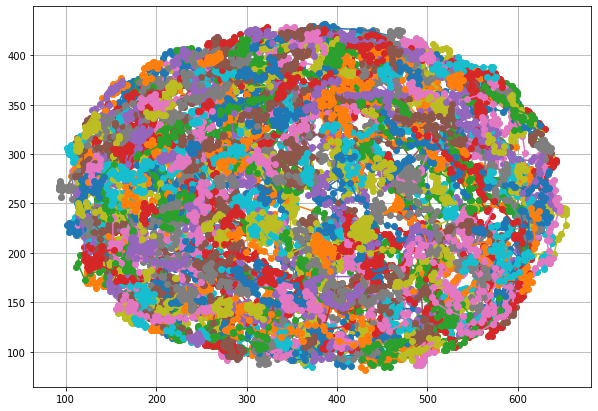

In [93]:
plot_movement_2d(cell_names_list =list(df.cell.unique()), text=False, legend=False)                                 

In [88]:
def trace_movement_3d(cellname):
    trace = df[df.cell.isin([cellname])]
    x = trace.x.values
    y = trace.y.values
    z = trace.z.values
    t = trace.time.values
    return x, y, z, t


def plot_movement_3d(cell_names_list = [], text=False, legend=False):
    
    traces = []
    f, ax = plt.subplots(figsize= (10,8))
    ax = plt.axes(projection="3d")

    for cellname in cell_names_list:
        x,y,z,t =  trace_movement_3d(cellname)
        traces.append([x,y,z,t])

    for i in range(len(traces)):
        ax.plot(traces[i][0], traces[i][1], traces[i][2], "o-", label = cell_names_list[i])

    if text:    
      for i in range(len(traces)):
          ax = put_text( traces[i][0], traces[i][1], traces[i][2], ax)

    if legend:    
      ax.legend(fontsize = 20)
      
    ax.grid()



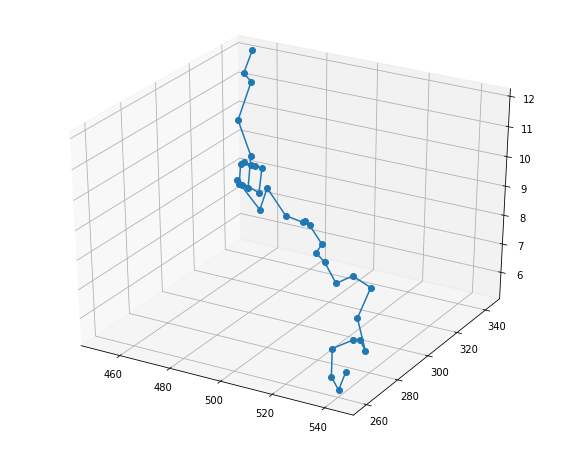

In [89]:
plot_movement_3d(cell_names_list =list(df.cell.unique())[-9:-8], text=False, legend=False)                                 

In [97]:
def plot_single_cell_movement_3d(cell_name, text=False, legend=False):

    df_sub=df.loc[df['cell']==cell_name]
    fig=go.Figure(data=go.Scatter3d(x=df_sub['x'], 
                                    y=df_sub['y'], 
                                    z=df_sub['z'], 
                                    marker=dict(size=4,
                                                color=df_sub['time'],
                                                colorscale='Viridis'),
                                    line=dict(color='blue',
                                              width=2)))
    fig.show()


In [ ]:
plot_single_cell_movement_3d(cell_name = list(df.cell.unique())[-9], text=False, legend=False)

In [ ]:
#for last 10 unique cell lineages
cell_list=list(df.cell.unique())[-10:]
df_sub=df.loc[df['cell'].isin(cell_list)]
fig1=px.scatter_3d(df_sub, x='x', y='y', z='z', color="cell")
fig1.show()

In [ ]:
#animate last 10k datapoints
df_sub=df.iloc[-10000:]
fig1=px.scatter_3d(df_sub, x='x', y='y', z='z', color="cell", animation_frame='time')
fig1.show()